In [1]:
!pip install ultralytics --upgrade
from ultralytics import YOLO


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip /content/drive/MyDrive/BPT/Military.zip -d /content/dataset/


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/military_object_dataset/val/images/011492.jpg  
  inflating: /content/dataset/military_object_dataset/val/images/011493.jpg  
  inflating: /content/dataset/military_object_dataset/val/images/011494.jpg  
  inflating: /content/dataset/military_object_dataset/val/images/011495.jpg  
  inflating: /content/dataset/military_object_dataset/val/images/011496.jpg  
  inflating: /content/dataset/military_object_dataset/val/images/011497.jpg  
  inflating: /content/dataset/military_object_dataset/val/images/011498.jpg  
  inflating: /content/dataset/military_object_dataset/val/images/011499.jpg  
  inflating: /content/dataset/military_object_dataset/val/images/011500.jpg  
  inflating: /content/dataset/military_object_dataset/val/images/011501.jpg  
  inflating: /content/dataset/military_object_dataset/val/images/011502.jpg  
  inflating: /content/dataset/military_object_dataset/val/images/011503.jpg  
  inflating: 

In [3]:
yaml_text = """
path: /content/dataset/military_object_dataset
train: /content/dataset/military_object_dataset/train
val: /content/dataset/military_object_dataset/val
test: /content/dataset/military_object_dataset/test

names:
  0: camouflage_soldier
  1: weapon
  2: military_tank
  3: military_truck
  4: military_vehicle
  5: civilian
  6: soldier
  7: civilian_vehicle
  8: military_artillery
  9: trench
  10: military_aircraft
  11: military_warship
"""
with open("military_dataset.yaml", "w") as f:
    f.write(yaml_text)


In [4]:
import os
import shutil

original_dataset = "/content/dataset/military_object_dataset"
output_dataset = "/content/reduced_dataset"

# Original to new class ID mapping
class_map = {1: 0, 3: 1, 4: 2, 8: 3, 11: 4}

def process_split(split):
    img_in = f"{original_dataset}/{split}/images"
    lbl_in = f"{original_dataset}/{split}/labels"
    img_out = f"{output_dataset}/{split}/images"
    lbl_out = f"{output_dataset}/{split}/labels"

    os.makedirs(img_out, exist_ok=True)
    os.makedirs(lbl_out, exist_ok=True)

    for file in os.listdir(lbl_in):
        label_path = os.path.join(lbl_in, file)
        new_lines = []

        with open(label_path, "r") as f:
            for line in f:
                parts = line.strip().split()
                cls = int(parts[0])
                if cls in class_map:
                    new_lines.append(f"{class_map[cls]} {' '.join(parts[1:])}\n")

        if new_lines:
            # Write new label file
            with open(os.path.join(lbl_out, file), "w") as f:
                f.writelines(new_lines)

            # Copy corresponding image
            img_file = file.replace(".txt", ".jpg")
            src_img = os.path.join(img_in, img_file)
            dst_img = os.path.join(img_out, img_file)
            if os.path.exists(src_img):
                shutil.copy(src_img, dst_img)

# Run on all splits
for split in ['train', 'val', 'test']:
    process_split(split)


# Updated YAML file


In [5]:
yaml_text = """
path: /content/reduced_dataset
train: train/images
val: val/images
test: test/images

names:
  0: weapon
  1: military_truck
  2: military_vehicle
  3: military_artillery
  4: military_warship
"""
with open("/content/reduced_dataset.yaml", "w") as f:
    f.write(yaml_text)


# EDA (Exploratory Data Analysis)

In [ ]:
# Count Images per set

import os

for split in ['train', 'val', 'test']:
    img_path = f"/content/dataset/military_object_dataset/{split}/images"
    count = len(os.listdir(img_path))
    print(f"{split.title()} set: {count} images")


Train set: 21978 images
Val set: 2941 images
Test set: 1396 images


In [ ]:
# Class Frequency Distribution

from collections import Counter

labels_path = "/content/dataset/military_object_dataset/train/labels"
class_counts = Counter()

for label_file in os.listdir(labels_path):
    with open(os.path.join(labels_path, label_file), 'r') as f:
        for line in f:
            class_id = int(line.split()[0])
            class_counts[class_id] += 1

# Map class IDs to names
class_names = [
    "camouflage_soldier", "weapon", "military_tank", "military_truck",
    "military_vehicle", "civilian", "soldier", "civilian_vehicle",
    "military_artillery", "trench", "military_aircraft", "military_warship"
]

for cid, count in sorted(class_counts.items()):
    print(f"{class_names[cid]}: {count}")


camouflage_soldier: 4477
weapon: 1210
military_tank: 17454
military_truck: 1245
military_vehicle: 1963
civilian: 52
soldier: 6502
civilian_vehicle: 519
military_artillery: 439
trench: 4
military_aircraft: 7337
military_warship: 2134


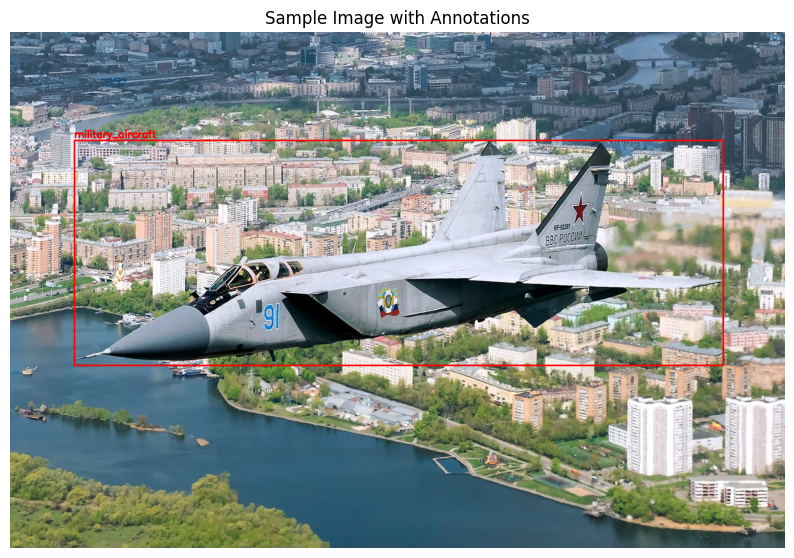

In [ ]:
# Visualize Sample bounding boxes

import cv2
import matplotlib.pyplot as plt

img_dir = "/content/dataset/military_object_dataset/train/images"
label_dir = "/content/dataset/military_object_dataset/train/labels"

# Pick a sample image
img_file = os.listdir(img_dir)[0]
img_path = os.path.join(img_dir, img_file)
label_path = os.path.join(label_dir, img_file.replace(".jpg", ".txt"))

# Load image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, _ = img.shape

# Draw bounding boxes
with open(label_path, "r") as f:
    for line in f:
        cls, x, y, bw, bh = map(float, line.strip().split())
        x1 = int((x - bw/2) * w)
        y1 = int((y - bh/2) * h)
        x2 = int((x + bw/2) * w)
        y2 = int((y + bh/2) * h)
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(img, class_names[int(cls)], (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,0,0), 2)

plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.title("Sample Image with Annotations")
plt.show()


# YOLOv8 Model Training

In [ ]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8n (nano) model - fast and lightweight
model = YOLO("yolov8n.pt")

# Start training
model.train(
    data="military_dataset.yaml",       # Dataset config
    epochs=50,                          # You can increase for better performance
    imgsz=640,                          # Image size (recommended: 640 or 512)
    batch=8,                            # Based on GPU RAM
    name="military_safety_yolov8",      # Folder name under runs/train
    patience=10,                        # Early stopping if no improvement
    save_period=5
)


100%|██████████| 6.25M/6.25M [00:00<00:00, 95.8MB/s]


Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=military_dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=military_safety_yolov8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=12.0, pr

100%|██████████| 755k/755k [00:00<00:00, 23.2MB/s]

Overriding model.yaml nc=80 with nc=12

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

 22        [15, 18, 21]  1    753652  ultralytics.nn.modules.head.Detect           [12, [64, 128, 256]]          
Model summary: 129 layers, 3,013,188 parameters, 3,013,172 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 95.8MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 29.7±29.5 MB/s, size: 123.9 KB)


train: Scanning /content/dataset/military_object_dataset/train/labels... 21978 images, 294 backgrounds, 0 corrupt: 100%|██████████| 21978/21978 [00:30<00:00, 712.61it/s] 


train: New cache created: /content/dataset/military_object_dataset/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 22, len(boxes) = 43336. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1129.2±931.3 MB/s, size: 113.2 KB)


val: Scanning /content/dataset/military_object_dataset/val/labels... 2941 images, 273 backgrounds, 0 corrupt: 100%|██████████| 2941/2941 [00:01<00:00, 1649.66it/s]

val: New cache created: /content/dataset/military_object_dataset/val/labels.cache


Plotting labels to runs/detect/military_safety_yolov8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/military_safety_yolov8
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.45G      1.327      2.722      1.437          5        640: 100%|██████████| 2748/2748 [09:36<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 184/184 [00:42<00:00,  4.37it/s]


                   all       2941       5081      0.411      0.295      0.229      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.46G      1.384      2.147      1.458         13        640: 100%|██████████| 2748/2748 [09:40<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 184/184 [00:38<00:00,  4.80it/s]


                   all       2941       5081      0.479      0.314      0.257      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.47G      1.472      2.078      1.524          8        640: 100%|██████████| 2748/2748 [09:21<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 184/184 [00:43<00:00,  4.21it/s]


                   all       2941       5081      0.354      0.249      0.218      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.48G      1.514      1.966      1.563          6        640: 100%|██████████| 2748/2748 [09:14<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 184/184 [00:35<00:00,  5.19it/s]


                   all       2941       5081      0.453      0.266      0.262      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.49G      1.455      1.806      1.524         15        640: 100%|██████████| 2748/2748 [09:02<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 184/184 [00:35<00:00,  5.15it/s]


                   all       2941       5081      0.477      0.302      0.293      0.171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       1.5G      1.416      1.695      1.496         14        640: 100%|██████████| 2748/2748 [08:52<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 184/184 [00:41<00:00,  4.40it/s]


                   all       2941       5081      0.388      0.359      0.334      0.198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.52G      1.383      1.606      1.468         23        640: 100%|██████████| 2748/2748 [08:59<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 184/184 [00:34<00:00,  5.38it/s]


                   all       2941       5081      0.454      0.358      0.359      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.53G      1.351      1.539      1.439          5        640: 100%|██████████| 2748/2748 [09:06<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 184/184 [00:35<00:00,  5.16it/s]


                   all       2941       5081      0.428      0.377      0.358      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.53G       1.33      1.497       1.42         31        640:  22%|██▏       | 616/2748 [01:59<05:46,  6.15it/s]

# Training for selected classes

In [7]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
model.train(
    data="/content/reduced_dataset.yaml",
    epochs=45,
    imgsz=640,
    batch=8,
    name="military_subset_yolo",
    patience=5,        # stops early if no improvement
    save_period=5      # saves weights every 5 epochs
)



Ultralytics 8.3.172 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/reduced_dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=45, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=military_subset_yolo, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0, plots=True, pose=12.

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 22        [15, 18, 21]  1    752287  ultralytics.nn.modules.head.Detect           [5, [64, 128, 256]]           
Model summary: 129 layers, 3,011,823 parameters, 3,011,807 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 983.1±403.8 MB/s, size: 93.7 KB)


train: Scanning /content/reduced_dataset/train/labels... 4209 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4209/4209 [00:01<00:00, 2354.07it/s]

train: New cache created: /content/reduced_dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 810.2±803.1 MB/s, size: 92.4 KB)


val: Scanning /content/reduced_dataset/val/labels... 533 images, 0 backgrounds, 0 corrupt: 100%|██████████| 533/533 [00:00<00:00, 606.97it/s]

val: New cache created: /content/reduced_dataset/val/labels.cache


Plotting labels to runs/detect/military_subset_yolo/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/military_subset_yolo
Starting training for 45 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/45      1.16G      1.286        2.5      1.465          2        640: 100%|██████████| 527/527 [01:48<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  4.15it/s]


                   all        533        930      0.268      0.422      0.304      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/45      1.53G      1.331      2.057      1.498          3        640: 100%|██████████| 527/527 [01:39<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.64it/s]


                   all        533        930       0.37       0.36      0.332       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/45      1.55G      1.374      1.907      1.543          7        640: 100%|██████████| 527/527 [01:39<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.81it/s]


                   all        533        930      0.557      0.331      0.304      0.167

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/45      1.56G      1.357      1.801      1.529          2        640: 100%|██████████| 527/527 [01:39<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.73it/s]


                   all        533        930      0.355      0.485      0.409      0.238

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/45      1.58G      1.313      1.681      1.493          1        640: 100%|██████████| 527/527 [01:39<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.42it/s]

                   all        533        930      0.621      0.367      0.412      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/45      1.59G      1.269      1.603      1.458          2        640: 100%|██████████| 527/527 [01:37<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.91it/s]

                   all        533        930      0.356      0.383      0.378      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/45      1.62G      1.243       1.53      1.441          5        640: 100%|██████████| 527/527 [01:38<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.59it/s]


                   all        533        930      0.438      0.546      0.477      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/45      1.63G      1.221      1.459      1.421          5        640: 100%|██████████| 527/527 [01:38<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.99it/s]

                   all        533        930      0.458      0.443      0.423      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/45      1.65G      1.209      1.438      1.412          6        640: 100%|██████████| 527/527 [01:38<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.56it/s]

                   all        533        930      0.545      0.522      0.522      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/45      1.67G      1.188      1.393      1.405          6        640: 100%|██████████| 527/527 [01:38<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.82it/s]

                   all        533        930       0.53      0.567      0.555      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/45      1.68G      1.165      1.341      1.376          2        640: 100%|██████████| 527/527 [01:36<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.80it/s]

                   all        533        930      0.571      0.519       0.56      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/45       1.7G      1.142      1.308      1.364          2        640: 100%|██████████| 527/527 [01:38<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.01it/s]

                   all        533        930      0.456      0.559      0.532      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/45      1.72G      1.135      1.285      1.366          2        640: 100%|██████████| 527/527 [01:36<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.70it/s]

                   all        533        930      0.581      0.527      0.557      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/45      1.72G      1.117      1.242      1.348          1        640: 100%|██████████| 527/527 [01:39<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.89it/s]

                   all        533        930      0.554      0.567      0.549      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/45      1.75G       1.12      1.246      1.349          4        640: 100%|██████████| 527/527 [01:38<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.51it/s]


                   all        533        930      0.625      0.553      0.595      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/45      1.77G      1.114       1.23      1.334          7        640: 100%|██████████| 527/527 [01:39<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.19it/s]

                   all        533        930      0.653      0.603      0.647      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/45      1.79G      1.088      1.171      1.327          2        640: 100%|██████████| 527/527 [01:36<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.01it/s]

                   all        533        930      0.672      0.595      0.642      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/45       1.8G      1.066      1.144      1.311          1        640: 100%|██████████| 527/527 [01:39<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.06it/s]

                   all        533        930      0.665      0.591      0.637      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/45      1.82G      1.057      1.131      1.297          4        640: 100%|██████████| 527/527 [01:38<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.76it/s]


                   all        533        930      0.628      0.658      0.659       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/45      1.84G       1.05      1.101      1.298          4        640: 100%|██████████| 527/527 [01:40<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.65it/s]

                   all        533        930      0.681      0.604      0.657       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/45      1.86G      1.045      1.076      1.292          4        640: 100%|██████████| 527/527 [01:37<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.82it/s]

                   all        533        930      0.675      0.591      0.656      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/45      1.86G      1.038      1.072      1.282          5        640: 100%|██████████| 527/527 [01:40<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.81it/s]

                   all        533        930      0.698       0.62      0.676      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/45      1.89G      1.013      1.057      1.275          7        640: 100%|██████████| 527/527 [01:37<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.09it/s]

                   all        533        930       0.68      0.581      0.667      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/45      1.91G      1.002      1.021      1.272          6        640: 100%|██████████| 527/527 [01:39<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.79it/s]

                   all        533        930      0.764      0.608       0.68      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/45      1.92G      1.011      1.025      1.264          2        640: 100%|██████████| 527/527 [01:37<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.58it/s]


                   all        533        930      0.743      0.614        0.7      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/45      1.94G     0.9946     0.9808      1.254          3        640: 100%|██████████| 527/527 [01:39<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.07it/s]


                   all        533        930      0.665      0.615      0.641      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/45      1.96G      0.977     0.9864      1.248          2        640: 100%|██████████| 527/527 [01:40<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.64it/s]

                   all        533        930      0.751       0.59       0.68      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/45      1.97G     0.9839     0.9604      1.243          2        640: 100%|██████████| 527/527 [01:38<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.87it/s]

                   all        533        930      0.771       0.58      0.678      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/45      1.99G     0.9588     0.9288      1.225          1        640: 100%|██████████| 527/527 [01:39<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.51it/s]

                   all        533        930      0.769       0.64      0.712       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/45         2G     0.9578     0.9246      1.228          2        640: 100%|██████████| 527/527 [01:37<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.01it/s]

                   all        533        930      0.731      0.635      0.695       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/45      2.03G     0.9408     0.9086       1.22         17        640: 100%|██████████| 527/527 [01:39<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.75it/s]

                   all        533        930      0.777      0.627        0.7      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/45      2.04G     0.9325     0.8918      1.219          6        640: 100%|██████████| 527/527 [01:39<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.06it/s]


                   all        533        930      0.751      0.637      0.706      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/45      2.06G     0.9275     0.8721      1.208          2        640: 100%|██████████| 527/527 [01:39<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.93it/s]

                   all        533        930      0.737      0.639      0.707       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/45      2.08G     0.9176     0.8618      1.202          4        640: 100%|██████████| 527/527 [01:38<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.58it/s]

                   all        533        930      0.699      0.658       0.71      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/45      2.09G     0.9051     0.8399      1.198          2        640: 100%|██████████| 527/527 [01:40<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.85it/s]

                   all        533        930      0.775      0.659      0.725       0.49


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/45      2.11G     0.8385     0.7159      1.183          3        640: 100%|██████████| 527/527 [01:35<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.64it/s]

                   all        533        930      0.763      0.646      0.719      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/45      2.13G     0.8122     0.6729      1.159          1        640: 100%|██████████| 527/527 [01:36<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.94it/s]

                   all        533        930      0.747      0.634      0.713       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/45      2.13G     0.7887     0.6466      1.149          4        640: 100%|██████████| 527/527 [01:33<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.80it/s]

                   all        533        930      0.748      0.665      0.721      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/45      2.16G     0.7749      0.632      1.144          1        640: 100%|██████████| 527/527 [01:33<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.38it/s]

                   all        533        930      0.762      0.644      0.719      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/45      2.18G     0.7739     0.6098      1.135          1        640: 100%|██████████| 527/527 [01:34<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.69it/s]

                   all        533        930      0.783      0.661      0.737      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/45       2.2G     0.7567     0.5994      1.115          1        640: 100%|██████████| 527/527 [01:33<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.80it/s]

                   all        533        930       0.78       0.65      0.735      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/45      2.21G     0.7434     0.5782      1.113          2        640: 100%|██████████| 527/527 [01:36<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.06it/s]

                   all        533        930      0.792      0.648      0.723      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/45      2.23G     0.7416     0.5728      1.109          3        640: 100%|██████████| 527/527 [01:34<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.17it/s]

                   all        533        930      0.789       0.65      0.729      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/45      2.25G     0.7385     0.5641      1.106          1        640: 100%|██████████| 527/527 [01:34<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.58it/s]

                   all        533        930      0.773      0.665      0.726      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/45      2.26G     0.7244     0.5516      1.094          1        640: 100%|██████████| 527/527 [01:34<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.98it/s]

                   all        533        930       0.79      0.639      0.726      0.502
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 40, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



45 epochs completed in 1.319 hours.
Optimizer stripped from runs/detect/military_subset_yolo/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/military_subset_yolo/weights/best.pt, 6.2MB

Validating runs/detect/military_subset_yolo/weights/best.pt...
Ultralytics 8.3.172 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.26it/s]


                   all        533        930      0.784       0.66      0.737      0.511
                weapon        222        358      0.817      0.687      0.737      0.521
        military_truck         84        148      0.727       0.63      0.698      0.456
      military_vehicle        149        307      0.777      0.693      0.761      0.555
    military_artillery         85        117      0.813      0.631      0.752      0.513
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/military_subset_yolo


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f9144added0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [9]:
!cp -r runs/detect/military_subset_yolo /content/drive/MyDrive/



# Model Evaluation

In [7]:
# load best checkpoint

from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/military_subset_yolo/weights/best.pt")



In [8]:
# Evaluate on validation dataset

metrics = model.val()

# Print key metrics
print("Precision:", metrics.box.p)
print("Recall:", metrics.box.r)
print("mAP@0.5:", metrics.box.map50)
print("mAP@0.5:0.95:", metrics.box.map)

Ultralytics 8.3.172 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1672.3±986.7 MB/s, size: 280.4 KB)



val: Scanning /content/reduced_dataset/val/labels... 533 images, 0 backgrounds, 0 corrupt: 100%|██████████| 533/533 [00:00<00:00, 1792.49it/s]


val: New cache created: /content/reduced_dataset/val/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  3.89it/s]


                   all        533        930      0.783       0.66      0.737      0.511
                weapon        222        358      0.814      0.687      0.737      0.521
        military_truck         84        148      0.727       0.63      0.697      0.457
      military_vehicle        149        307      0.777      0.693      0.761      0.553
    military_artillery         85        117      0.812      0.629      0.752      0.513
Speed: 0.4ms preprocess, 4.1ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/val
Precision: [    0.81443     0.72712     0.77723     0.81245]
Recall: [    0.68715     0.63017     0.69324     0.62944]
mAP@0.5: 0.7368730646111146
mAP@0.5:0.95: 0.511014211757999


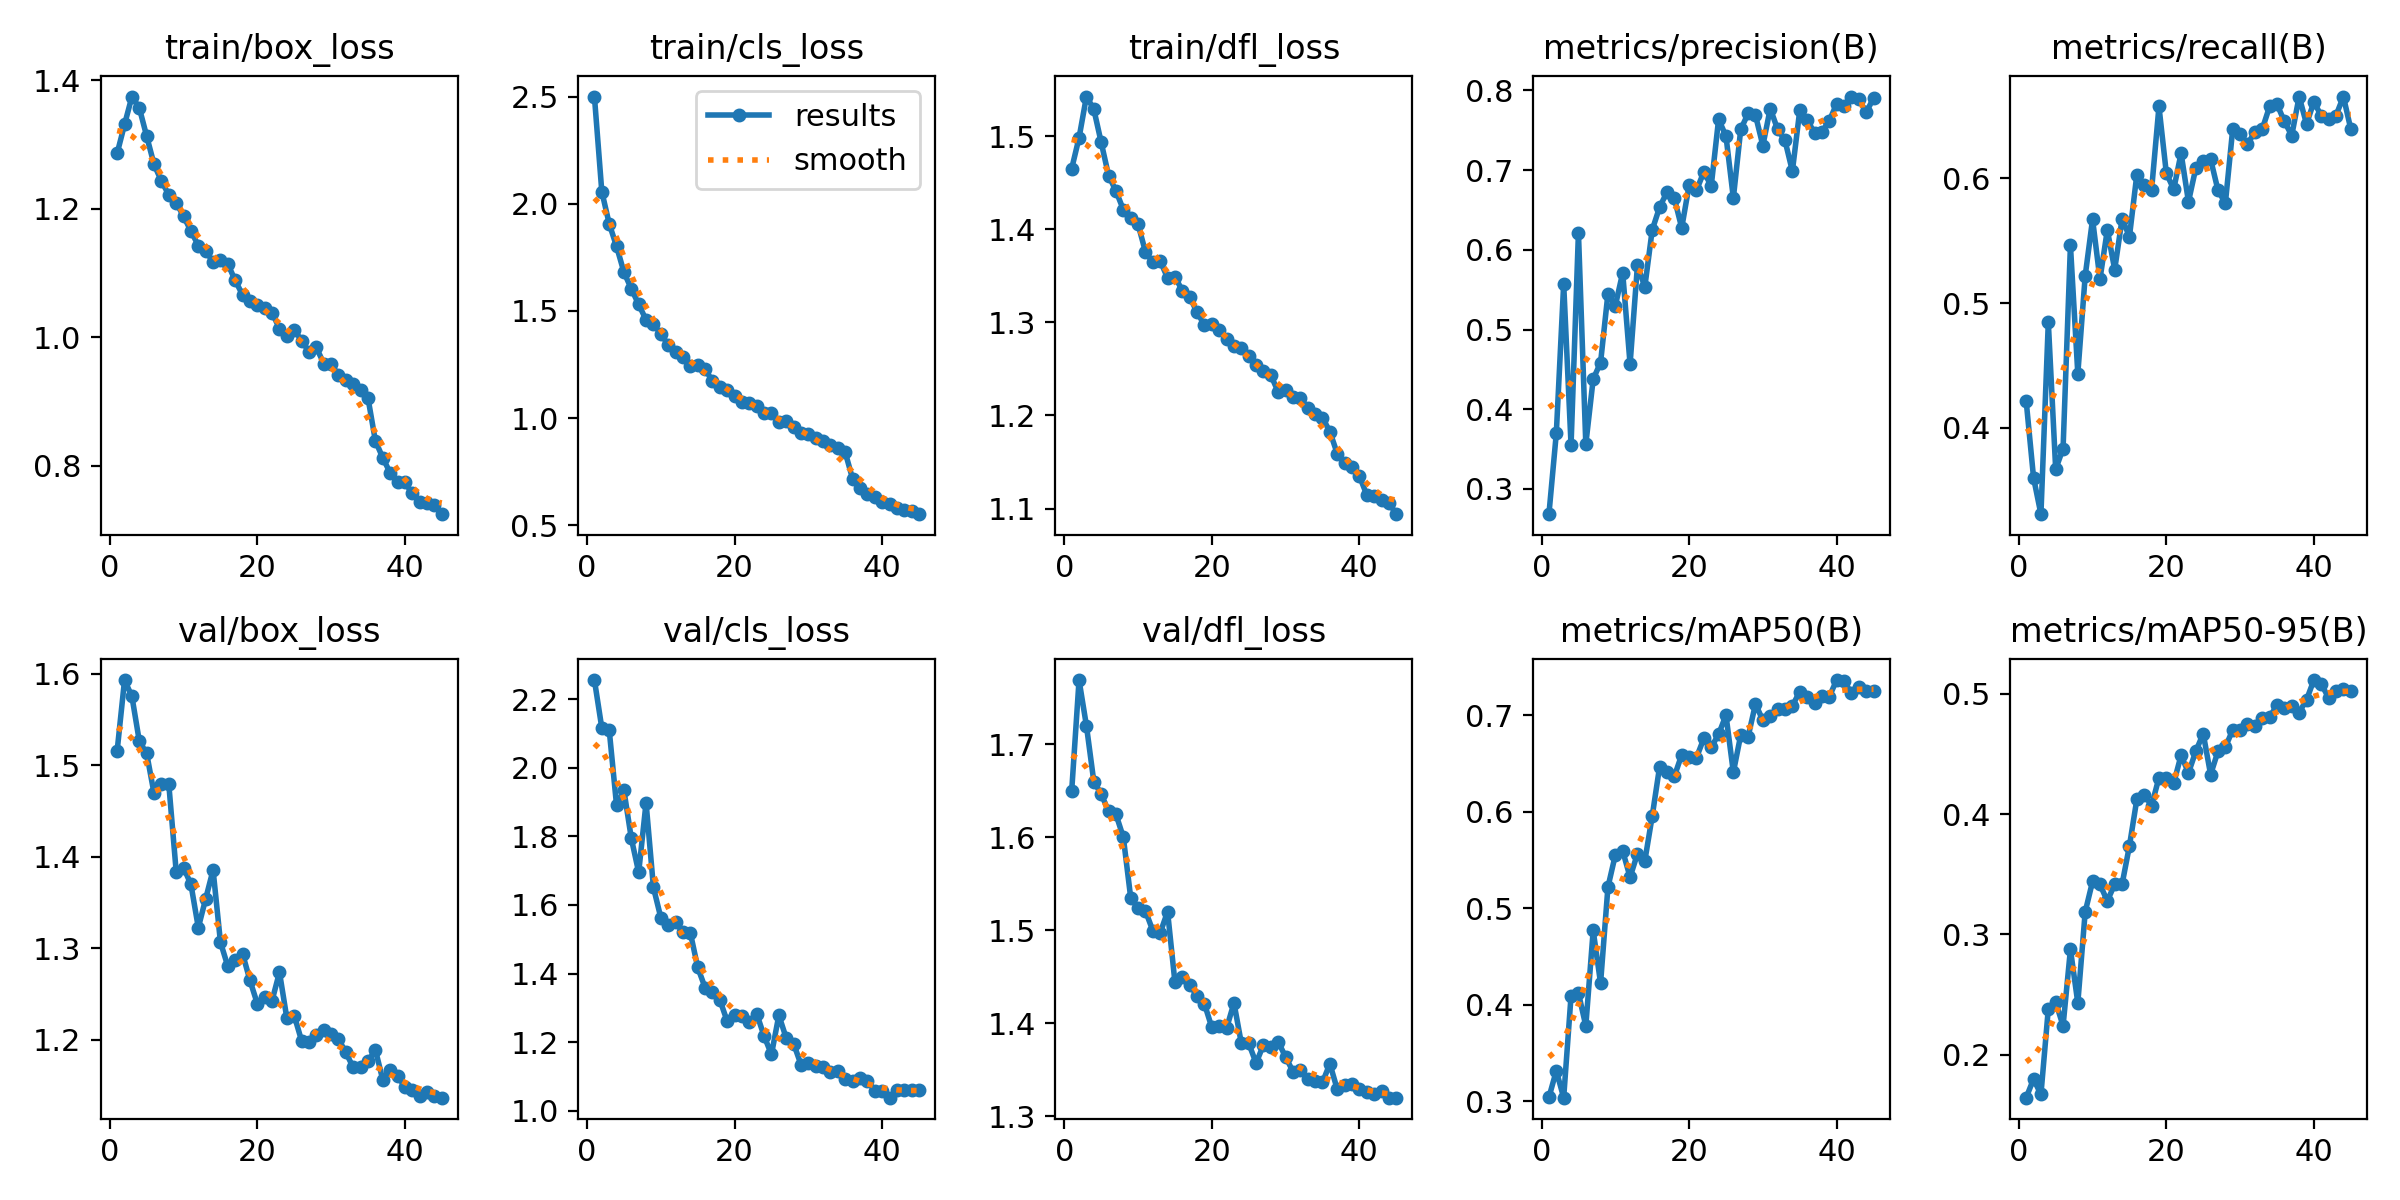

In [9]:
# Visualize evaluation results

from IPython.display import Image, display
display(Image(filename='/content/drive/MyDrive/military_subset_yolo/results.png'))



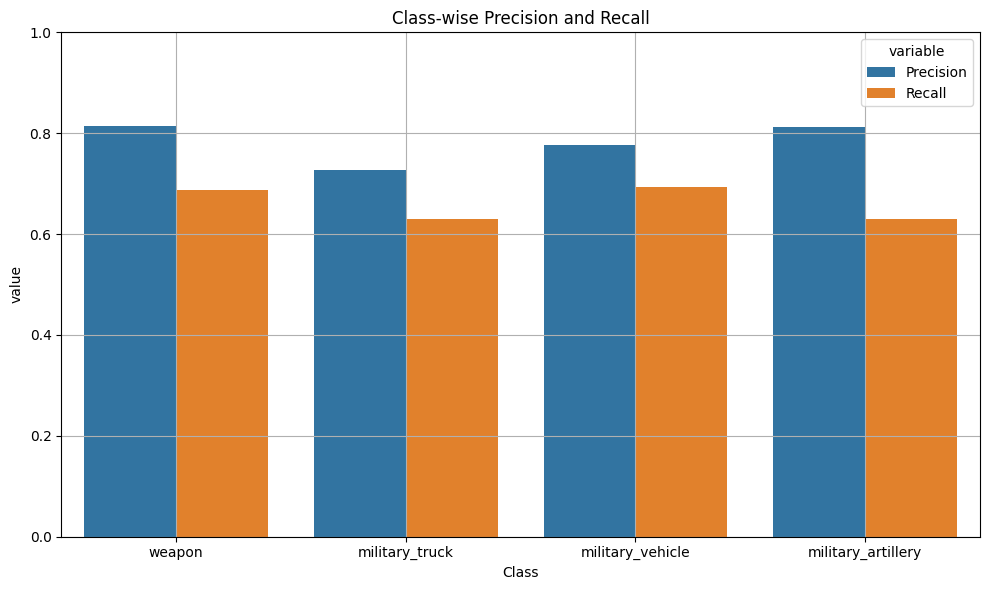

📌 Overall mAP@0.5: 0.737


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Metrics from your output
classes = ["weapon", "military_truck", "military_vehicle", "military_artillery"]
precision = [0.81443, 0.72712, 0.77723, 0.81245]
recall = [0.68715, 0.63017, 0.69324, 0.62944]
map_50 = 0.73687

# Create DataFrame
df = pd.DataFrame({
    "Class": classes,
    "Precision": precision,
    "Recall": recall
})

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=df.melt(id_vars="Class"), x="Class", y="value", hue="variable")
plt.title("Class-wise Precision and Recall")
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print summary
print("📌 Overall mAP@0.5:", round(map_50, 3))


# Optional: Save as CSV
df.to_csv("model_performance_report.csv", index=False)


# Inference AND Visualization

In [20]:
# Load the trained model

from ultralytics import YOLO

# Load your best saved model (update path if needed)
model = YOLO("/content/drive/MyDrive/military_subset_yolo/weights/best.pt")


In [21]:
# Predict on test images folder

# Run prediction on all test images
results = model.predict(
    source="/content/dataset/military_object_dataset/test/images",  # path to test images
    conf=0.3,               # confidence threshold
    save=True,              # saves output images with boxes to a folder
    save_txt=True,          # optional: saves prediction txt files (YOLO format)
    project="runs/predict", # output base folder
    name="military_infer",  # subfolder name
    exist_ok=True           # overwrite if exists
)




WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1396 /content/dataset/military_object_dataset/test/images/000001.jpg: 640x640 (no detections), 9.1ms
image 2/1396 /content/dataset/military_object_dataset/test/images/000002.jpg: 640x640 (no detections), 7.4ms
image 3/1396 /content/dataset/military_object_dataset/test/images/000003.jpg: 640x640 (no detections), 7.4ms
image 4/1396 /content/dataset/military_object_dataset/test/images/000004.jpg: 640x640 1 weapon, 12.5ms
image 5/1396 /content/data

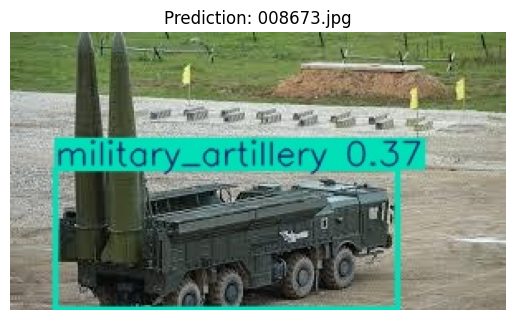

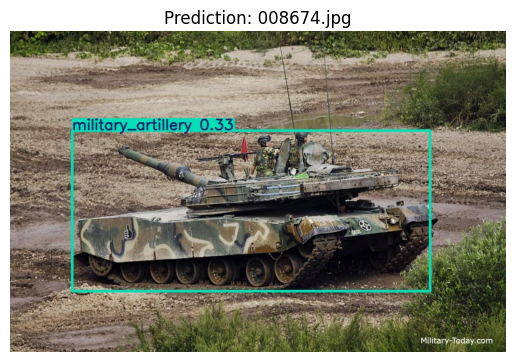

In [24]:
# Display few output images

import matplotlib.pyplot as plt
import cv2
import os

# Change path based on output
output_path = "/content/drive/MyDrive/BPT/inference_outputs"

# List predicted images
# Only list image files
predicted_images = [f for f in os.listdir(output_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Display first 3 predictions
for i in range(min(2, len(predicted_images))):
    img = cv2.imread(os.path.join(output_path, predicted_images[i]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_images[i]}")
    plt.axis('off')
    plt.show()

In [15]:
# save predictions to drive

!cp -r runs/predict/military_infer /content/drive/MyDrive/BPT/inference_outputs/


## STREAMLIT

In [6]:
!pip install streamlit streamlit_option_menu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.3/829.3 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.2 MB/s eta 0:00:00


In [7]:
%%writefile military.py

import streamlit as st
from ultralytics import YOLO
from PIL import Image
import numpy as np

st.title("Military Object Detection using YOLOv8")
st.markdown("Upload an image to detect")

# Load model
model = YOLO("/content/drive/MyDrive/military_subset_yolo/weights/best.pt")

uploaded_file = st.file_uploader("Upload Image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    img = Image.open(uploaded_file).convert("RGB")
    st.image(img, caption="Uploaded Image", use_column_width=True)

    with st.spinner("Detecting..."):
        results = model.predict(img, conf=0.3)
        result_img = results[0].plot()

        st.image(result_img, caption="Detection Result", use_column_width=True)

        # Optional: show detected classes
        st.subheader("Detected Classes")
        for box in results[0].boxes.data:
            cls = int(box[-1])
            conf = box[-2].item()
            st.write(f"Class ID: {cls}, Confidence: {conf:.2f}")


Writing military.py


In [8]:
!wget -q -O - ipv4.icanhazip.com   # this command will generate a password for you(copy that)

34.168.127.163


In [ ]:
! streamlit run military.py & npx localtunnel --port 8501

⠙

⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.168.127.163:8501

⠴⠦⠧Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏your url is: https://cute-clocks-slide.loca.lt
2025-08-02 11:58:38.798 Failed to schedule watch observer for path /content
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/streamlit/web/bootstrap.py", line 348, in run
    if asyncio.get_running_loop().is_running():
       ^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: no running event loop

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/streamlit/watcher/event_based_path_watcher.py", line 186, in watch_path
    folder_handler.watch = self._observer.schedule(
                           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "